# Codewars problems

## Problem statement: [Build a pile of cubes](https://www.codewars.com/kata/5592e3bd57b64d00f3000047/)

Your task is to construct a building which will be a pile of n cubes. The cube at the bottom will have a volume of n^3, the cube above will have volume of (n−1)^3 and so on until the top which will have a volume of 1^3.

You are given the total volume m of the building. Being given m can you find the number n of cubes you will have to build?

The parameter of the function findNb (find_nb, find-nb, findNb, ...) will be an integer m and you have to return the integer n such as n^3 + (n-1)^3 + (n-2)^3 + ... + 1^3 = m if such a n exists or -1 if there is no such n.

Examples:

findNb(1071225) --> 45

findNb(91716553919377) --> -1

### Solution: Calculating the sum of cubes

This classic problem can be solved by by populating a numpy array with the cumulative sum of the cubes of the first n natural numbers. We can then check whether the last value is larger than m. If not, we can grow the array. Once m is smaller than the last value, we can use a binary search to find the index of m in the array. If m is not in the array, we return -1.

In [21]:
# The "dumb" solution, using np cumsum
import numpy as np

ARR = np.array([0])

def grow_matrix():
    global ARR
    arr_len = len(ARR)
    n = np.arange(arr_len, arr_len + 10000)
    cumsum_cubes = np.cumsum(n**3, dtype=np.uint64) + ARR[-1]
    ARR = np.concatenate([ARR, cumsum_cubes])

def find_nb(m):
    while m > ARR[-1]:
        grow_matrix()
    idx = np.searchsorted(ARR, m)
    return idx if idx < len(ARR) and ARR[idx] == m else -1

print(find_nb(1026113397183228025))

45010


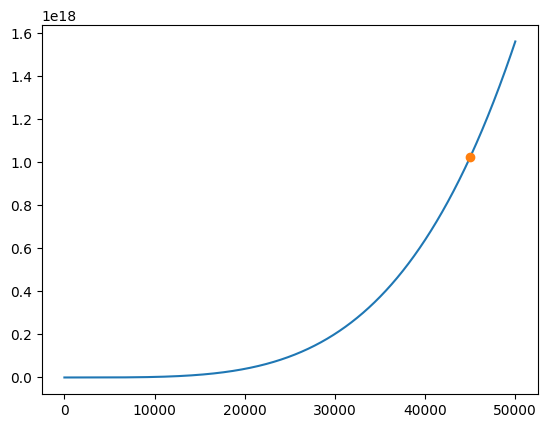

In [24]:
# Plotting the sum of cubes the "dumb" way
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1, 50000)

# Plot using the matrix data
plt.plot(n, ARR[0:len(n)])
# Plot the point where the value of m is
plt.plot(45010, 1026113397183228025, 'o', label='m')
plt.show()

### Closed form solution

However, this is not the most efficient solution. The sum of cubes has a closed form solution, which is given by the formula:

$$
m = \frac{n^2(n+1)^2}{4}
$$

We can use this to find the number of cubes without having to populate an entire array. First, let's plot the sum of cubes using the closed form solution to verify that it looks like the previous plot:

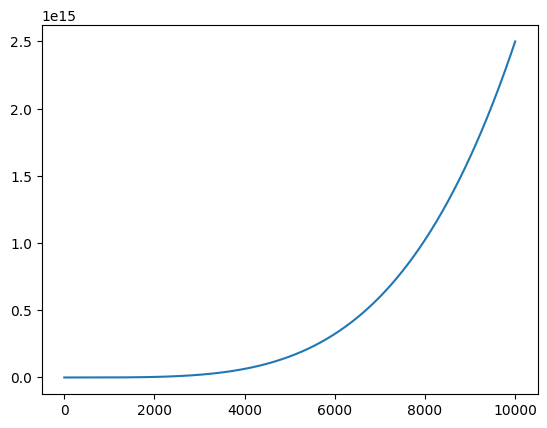

In [15]:
# Plotting the sum of cubes using the closed form solution
import numpy as np

n = np.arange(1, 100000)
cumsum_cubes = (n**2 * (n+1)**2) / 4

plt.plot(n, cumsum_cubes)
plt.show()

We know the value of m and want to solve for n. Given the closed form solution, we can rearrange the formula into a quartic polynomial and solve for n using the `np.roots` function.

Step 1: multiply both sides by 4 to eliminate the fraction:

$$
4m = n^2(n+1)^2
$$

Step 2: expand the right side:

$$
4m = n^2(n^2 + 2n + 1)
$$

$$
4m = n^4 + 2n^3 + n^2
$$

Step 3: rearrange the equation to form a polynomial:

$$
n^4 + 2n^3 + n^2 - 4m = 0
$$

We then insert the value of m to get the constant term, and solve for n using `np.roots`.

In [26]:
import numpy as np

def calculate_sum_of_cubes(n):
    return (n * (n + 1) // 2) ** 2

def verify_root(root, m):
    return calculate_sum_of_cubes(root) == m

def find_nb(m):
    roots = np.roots([1, 2, 1, 0, -4*m])
    real_positive_roots = [root.real for root in roots
                           if root.imag == 0 and (
                               root.real > 0
                           )]
    rounded = round(real_positive_roots[0])
    return rounded if verify_root(rounded, m) else -1

print(find_nb(1026113397183228025))


45010
